In [1]:
# import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import the Data

First, we pull the data from the file, and add a timeseries index. Printing the first five entries to show what the frame looks like:

In [2]:
data_path = './fatal-police-shootings-data.csv'
data = pd.read_csv(data_path)
data.index = pd.to_datetime(data['date'])
data.groupby(by=[data.index.month, data.index.year])
 
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
date,,,,,,,,,,,,,,
2015-01-02,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
2015-01-02,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2015-01-03,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
2015-01-04,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
2015-01-04,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


### Example pivot: Body camera usage

Group the data by month and year, summing a count of deaths and if a body camera was used:

In [3]:
pivot_df = data.pivot_table(index=[data.index.year,data.index.month], columns='body_camera',\
                            values='manner_of_death', aggfunc='count', fill_value=0)
pivot_df.head()

body_camera  False  True 
date date                
2015 1          69      7
     2          75      2
     3          85      7
     4          74     10
     5          66      5

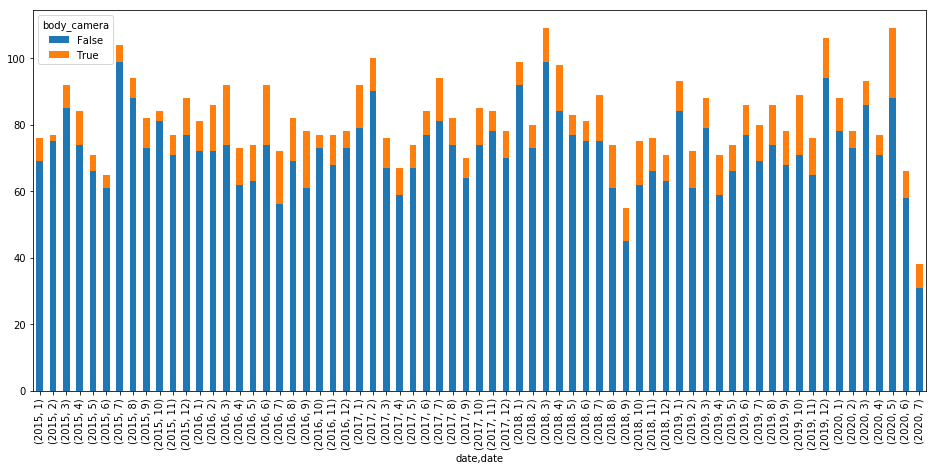

In [4]:
pivot_df.plot.bar(stacked=True, figsize=(16,7))

### Example 2: Unarmed Killings Over Time

Here, we load two helper files. `arm_classification.csv` classifies the data on what arms the victims were carrying. `arm_class_key.csv` is a key for the numbers in `arm_classification.csv`. 

In [5]:
# Load in the classifications I made. Panda's oneliner is slow but fine here
arm_class = pd.read_csv('./arm_classification.csv',  header=None, index_col=0, squeeze=True).to_dict()
arm_class_key = pd.read_csv('./arm_class_key.csv', header=None, index_col=0, squeeze=True).to_dict()

arm_class_data = data.copy()
arm_class_data['armed_class'] = arm_class_data['armed'].map(arm_class)
arm_class_data['armed_class_key'] = arm_class_data['armed_class'].map(arm_class_key)

The data provided had over 50 values for if the victim was armed or not, so we bucketed that into 5 categories:

In [6]:
print(arm_class_key)

{0: 'Unknown',
 1: 'Gun equiv. or worse',
 2: 'Other deadly weapon',
 3: 'Not a real weapon',
 4: 'Vehicle',
 5: 'Unarmed'}

Plotting this over time, a few different ways:
1. Showing all of the data
2. Removing armed victims (this could be thought of, gernerously to law enforcement, as situations where deadly force was 'clearly necessary'
3. Same as two, but also removing things like where people had machetes, where deadly force was 'hard to avoid'

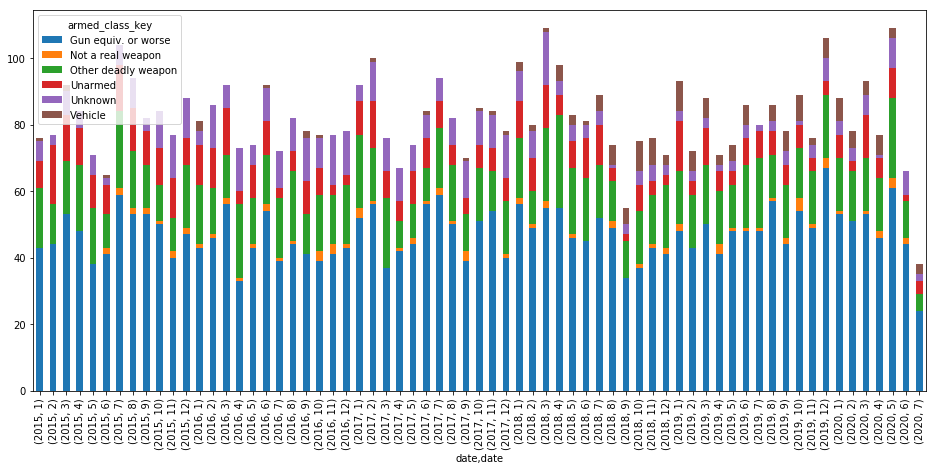

In [7]:
unarm_df = arm_class_data.pivot_table(index=[data.index.year,data.index.month], columns='armed_class_key',\
                            values='manner_of_death', aggfunc='count', fill_value=0)

unarm_df.plot.bar(stacked=True, figsize=(16,7))

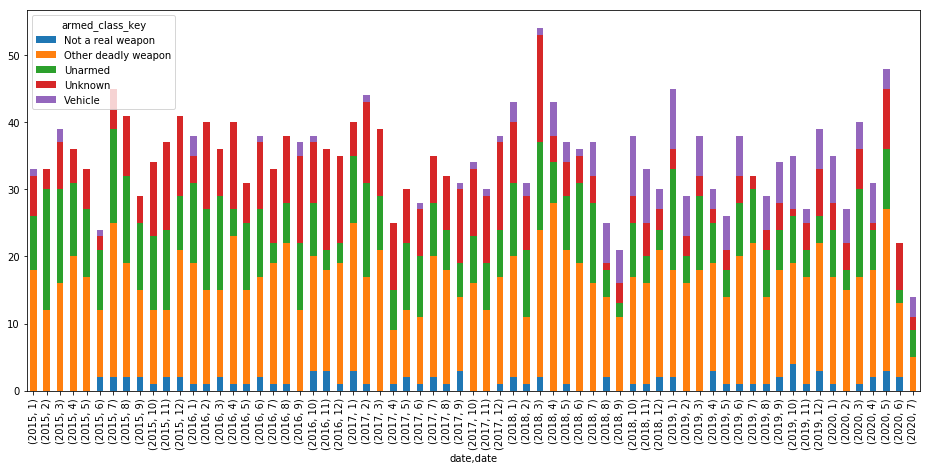

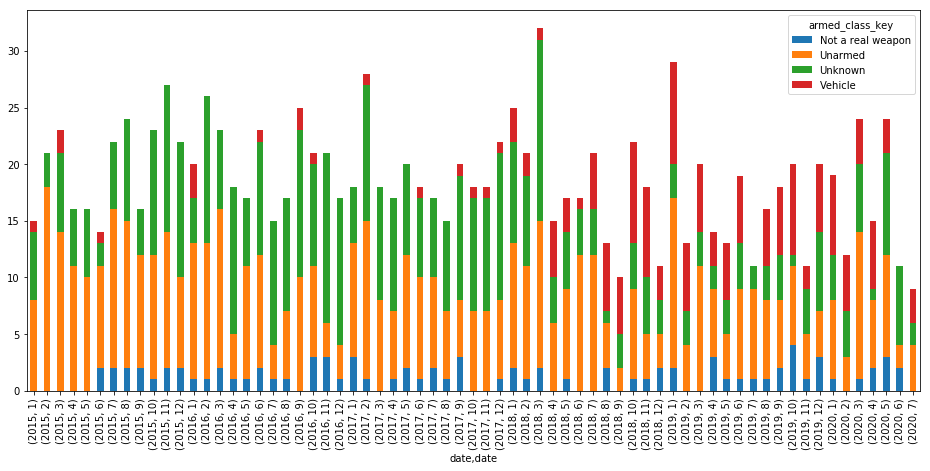

In [16]:
unarm_df = unarm_df.filter(items=['Not a real weapon', 'Other deadly weapon', 'Unarmed', 'Unknown', 'Vehicle'])
unarm_df.plot.bar(stacked=True, figsize=(16,7))

unarm_df = unarm_df.filter(items=['Not a real weapon', 'Unarmed', 'Unknown', 'Vehicle'])
unarm_df.plot.bar(stacked=True, figsize=(16,7))

Lastly - we'll look at the number of unarmed killings (as defined in the last graph above), by broken down by race:

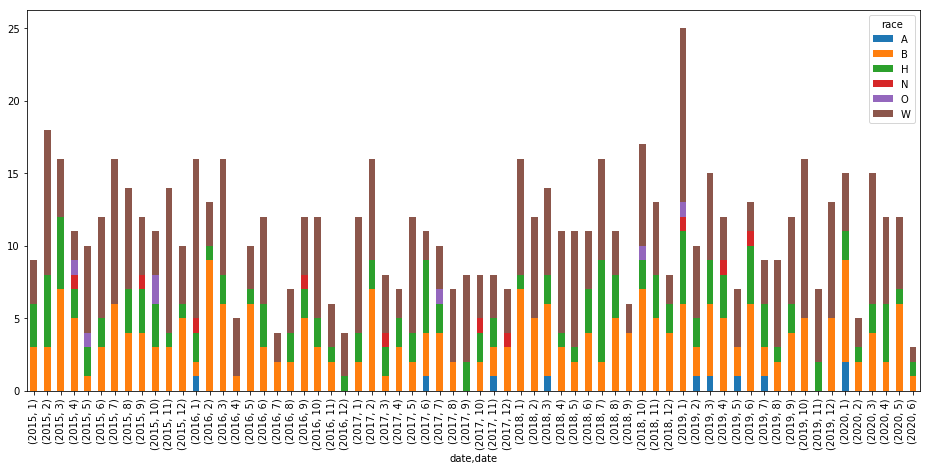

In [37]:
unarmed_data = arm_class_data[arm_class_data["armed_class"] >= 3]


race_df = unarmed_data.pivot_table(index=[unarmed_data.index.year,unarmed_data.index.month], columns='race',\
                            values='manner_of_death', aggfunc='count', fill_value=0)

race_df.plot.bar(stacked=True, figsize=(16,7))

And then here we'll remove people not traditionally thought to be the victim of police racism:

race  A   B   H  N  O   W
date                     
2015  0  47  30  2  4  70
2016  1  40  17  2  0  57
2017  2  31  23  3  1  54
2018  1  53  25  0  1  66
2019  4  44  25  3  1  71
2020  2  22  11  0  0  27


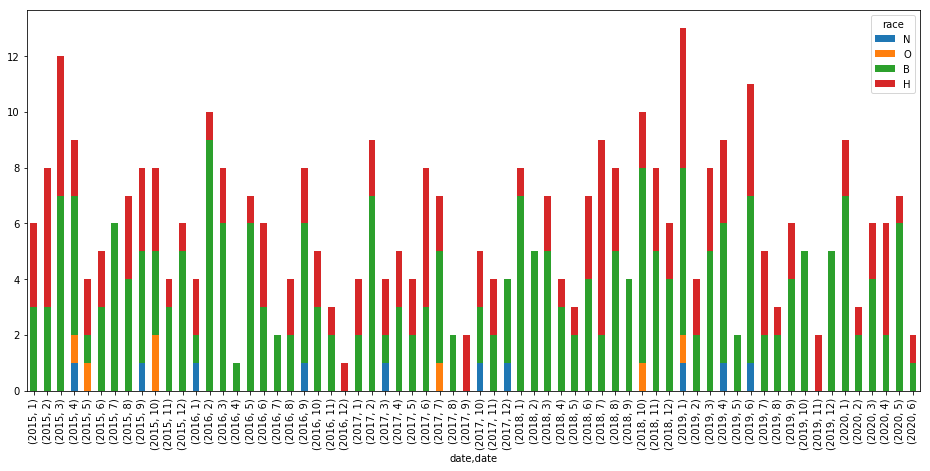

In [43]:
race_df = race_df.filter(items=['N', 'O', 'B', 'H'])
race_df.plot.bar(stacked=True, figsize=(16,7))

print(unarmed_data.pivot_table(index=unarmed_data.index.year, columns='race',\
                            values='manner_of_death', aggfunc='count', fill_value=0))

This has an unsurprising result:
1. Unarmed Black americans are killed by police slightly less often the white americans, but since they comprise a much smaller percentage of Americans (~13% to ~50%), this is wildly disproportionate. Statistics like this are often seen floating around social media but often don't look at the unarmed subset. 


And a suprising one:
1. Overall numbers are much lower than what I have heard discussed (a few hundred a year) - around 100 people die a year from bee stings, 200 from traffic accidents with deer, etc.  

### Example 3: A real statistics example

The above examples show simple data exploration, but if that's all we wanted to do, we would have used Excel. Let's look at another example where we analyze this data a bit further. 

In [ ]:
# to do 